#**PROJECT 2 - ELECTRIC VEHICLE SALES BY STATE IN INDIA**

# **Import Required Libraries**

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import wordcloud
import geopandas as gpd


# **Load the dataset**

In [78]:
data = pd.read_csv('/content/drive/MyDrive/Electric Vehicle Sales by State in India.csv')
data.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [80]:
data.shape

(96845, 8)

In [81]:
data.size

774760

In [7]:
data.columns

Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')

In [82]:
data.describe()

,Year,EV_Sales_Quantity
count,96845.000000,96845.000000
mean,2018.622768,37.108896
std,2.895581,431.566675
min,2014.000000,0.000000
25%,2016.000000,0.000000
50%,2019.000000,0.000000
75%,2021.000000,0.000000
max,2024.000000,20584.000000


In [83]:
data['Date'].describe()

,Date
count,96845
unique,121
top,3/1/2020
freq,933


In [84]:
data['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 96845 entries, 0 to 96844
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
96845 non-null  object
dtypes: object(1)
memory usage: 756.7+ KB


In [85]:
data['State'].describe()

,State
count,96845
unique,34
top,Maharashtra
freq,4912


In [86]:
data['State'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 96845 entries, 0 to 96844
Series name: State
Non-Null Count  Dtype 
--------------  ----- 
96845 non-null  object
dtypes: object(1)
memory usage: 756.7+ KB


In [87]:
data['Vehicle_Class'].describe()

,Vehicle_Class
count,96845
unique,73
top,MOTOR CAR
freq,4111


In [88]:
data['Vehicle_Category'].describe()

,Vehicle_Category
count,96845
unique,5
top,Others
freq,54423


In [89]:
data['Vehicle_Type'].describe()

,Vehicle_Type
count,96845
unique,12
top,Others
freq,54423


In [90]:
data['EV_Sales_Quantity'].describe()

,EV_Sales_Quantity
count,96845.000000
mean,37.108896
std,431.566675
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,20584.000000


In [91]:
data

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0
...,...,...,...,...,...,...,...,...
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0


In [92]:
data['Vehicle_Class'].value_counts()

,count
Vehicle_Class,
MOTOR CAR,4111
M-CYCLE/SCOOTER,4101
GOODS CARRIER,4096
MOTOR CAB,3985
BUS,3813
...,...
SEMI-TRAILER (COMMERCIAL),18
X-RAY VAN,12
MOTOR CYCLE/SCOOTER-WITH TRAILER,9


In [93]:
data['Vehicle_Type'].value_counts()

,count
Vehicle_Type,
Others,54423
2W_Personal,11700
Bus,7026
4W_Shared,4580
4W_Personal,4111
3W_Shared,3786
3W_Goods,3208
Institution Bus,2093
3W_Shared_LowSpeed,1951


In [94]:
data['Vehicle_Category'].value_counts()

,count
Vehicle_Category,
Others,54423
2-Wheelers,13121
3-Wheelers,11491
Bus,9119
4-Wheelers,8691


In [95]:
data['State'].value_counts()

,count
State,
Maharashtra,4912
Karnataka,4830
Uttar Pradesh,4557
Rajasthan,4552
Gujarat,4517
West Bengal,4196
Tamil Nadu,4063
Odisha,4027
Haryana,3842


In [96]:
data['Year'].value_counts()

,count
Year,
2019.0,10315
2023.0,10279
2018.0,10225
2022.0,10021
2017.0,9799
2016.0,9348
2021.0,9249
2015.0,9052
2014.0,9022


# **Data Cleaning**

In [97]:
#Checking for missing values
print(data.isnull().sum())

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [99]:
#Convert Date column in datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [100]:
#Convert Year column in int
data['Year'] = data['Year'].astype(int)

In [101]:
#Convert other columns in category type
data['State'] = data['State'].astype('category')
data['Vehicle_Class'] = data['Vehicle_Class'].astype('category')
data['Vehicle_Type'] = data['Vehicle_Type'].astype('category')
data['Vehicle_Category'] = data['Vehicle_Category'].astype('category')
data['Month_Name'] = data['Month_Name'].astype('category')

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               96845 non-null  int64         
 1   Month_Name         96845 non-null  category      
 2   Date               96845 non-null  datetime64[ns]
 3   State              96845 non-null  category      
 4   Vehicle_Class      96845 non-null  category      
 5   Vehicle_Category   96845 non-null  category      
 6   Vehicle_Type       96845 non-null  category      
 7   EV_Sales_Quantity  96845 non-null  float64       
dtypes: category(5), datetime64[ns](1), float64(1), int64(1)
memory usage: 2.7 MB


In [103]:
data.shape

(96845, 8)

In [104]:
#check for duplicates
duplicates = data.duplicated().sum()
print(duplicates)


0


In [105]:
#drop duplicates (if any)
data.drop_duplicates(inplace=True)
print(data.shape)

(96845, 8)


In [106]:
data.dtypes

,0
Year,int64
Month_Name,category
Date,datetime64[ns]
State,category
Vehicle_Class,category
Vehicle_Category,category
Vehicle_Type,category
EV_Sales_Quantity,float64


# **Exploratory Data Analysis**

In [107]:
data.columns

Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')

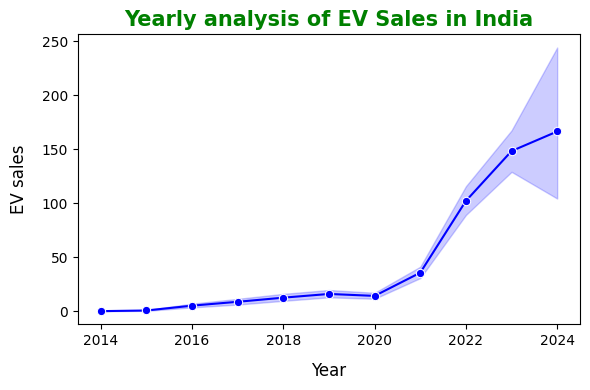

In [108]:
#Yearly analysis of EV Sales in India
plt.figure(figsize=(6,4))
sns.lineplot(x='Year',y='EV_Sales_Quantity',data=data,marker='o',color='b')
plt.title('Yearly analysis of EV Sales in India',fontsize=15,fontweight='bold',color='green')
plt.xlabel('Year',fontsize=12,labelpad=10)
plt.ylabel('EV sales',fontsize=12,labelpad=10)
plt.tight_layout()
plt.show()

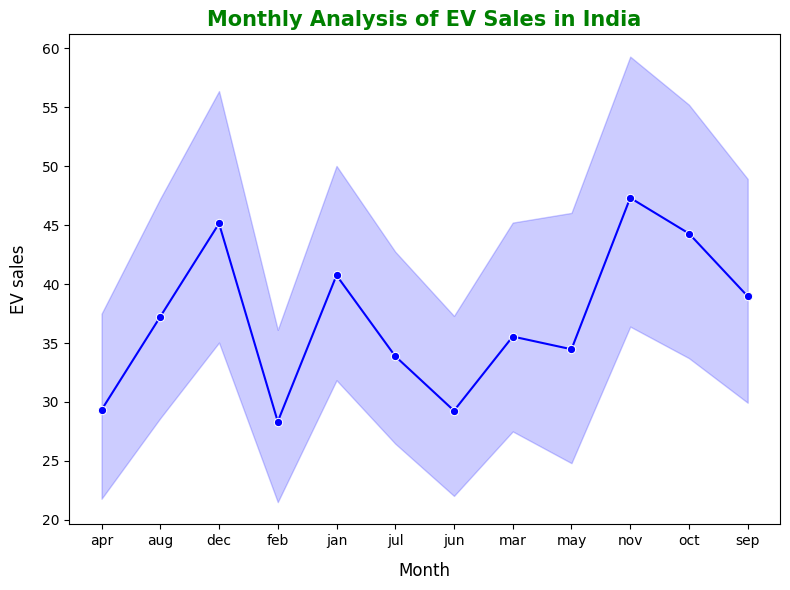

In [33]:
#Monthly analysis of EV sales in India
plt.figure(figsize=(8,6))
sns.lineplot(x='Month_Name',y='EV_Sales_Quantity',data=data,marker='o',color='b')
plt.title('Monthly Analysis of EV Sales in India',fontsize=15,fontweight='bold',color='green')
plt.xlabel('Month',fontsize=12,labelpad=10)
plt.ylabel('EV sales',fontsize=12,labelpad=10)
plt.tight_layout()
plt.show()

In [109]:
# Sort data by EV_Sales_Quantity in descending order
data_sorted = data.sort_values(by='EV_Sales_Quantity', ascending=False)
data_sorted

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
64430,2023,aug,2023-08-01,Uttar Pradesh,E-RICKSHAW(P),3-Wheelers,3W_Shared_LowSpeed,20584.0
96650,2023,dec,2023-12-01,Uttar Pradesh,E-RICKSHAW(P),3-Wheelers,3W_Shared_LowSpeed,20352.0
40513,2023,may,2023-05-01,Maharashtra,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,19908.0
72478,2023,sep,2023-09-01,Uttar Pradesh,E-RICKSHAW(P),3-Wheelers,3W_Shared_LowSpeed,19486.0
56533,2023,jul,2023-07-01,Uttar Pradesh,E-RICKSHAW(P),3-Wheelers,3W_Shared_LowSpeed,18769.0
...,...,...,...,...,...,...,...,...
26,2014,jan,2014-01-01,Arunachal Pradesh,BUS,Bus,Bus,0.0
25,2014,jan,2014-01-01,Arunachal Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
24,2014,jan,2014-01-01,Andhra Pradesh,VEHICLE FITTED WITH RIG,Others,Others,0.0
23,2014,jan,2014-01-01,Andhra Pradesh,TRAILER FOR PERSONAL USE,Others,Others,0.0


In [110]:
#State wise analysis of EV sales
statewise_sales = data.groupby('State')['EV_Sales_Quantity'].sum().reset_index()
statewise_sales.columns=['State','EV_Sales']
statewise_sales


<ipython-input-110-ca090c794562>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,State,EV_Sales
0,Andaman & Nicobar Island,202.0
1,Andhra Pradesh,77356.0
2,Arunachal Pradesh,40.0
3,Assam,151917.0
4,Bihar,213465.0
5,Chandigarh,11453.0
6,Chhattisgarh,75275.0
7,DNH and DD,431.0
8,Delhi,268538.0
9,Goa,17382.0


In [111]:
# Sort by EV_Sales in descending order
data_sorted1 = statewise_sales.sort_values(by='EV_Sales', ascending=False)
data_sorted1


,State,EV_Sales
31,Uttar Pradesh,732074.0
19,Maharashtra,401535.0
15,Karnataka,315498.0
8,Delhi,268538.0
27,Rajasthan,228573.0
4,Bihar,213465.0
29,Tamil Nadu,206902.0
10,Gujarat,176713.0
3,Assam,151917.0
16,Kerala,133246.0


In [112]:
total_sales = data['EV_Sales_Quantity'].sum()
print("Total EV Sales:", total_sales)


Total EV Sales: 3593811.0


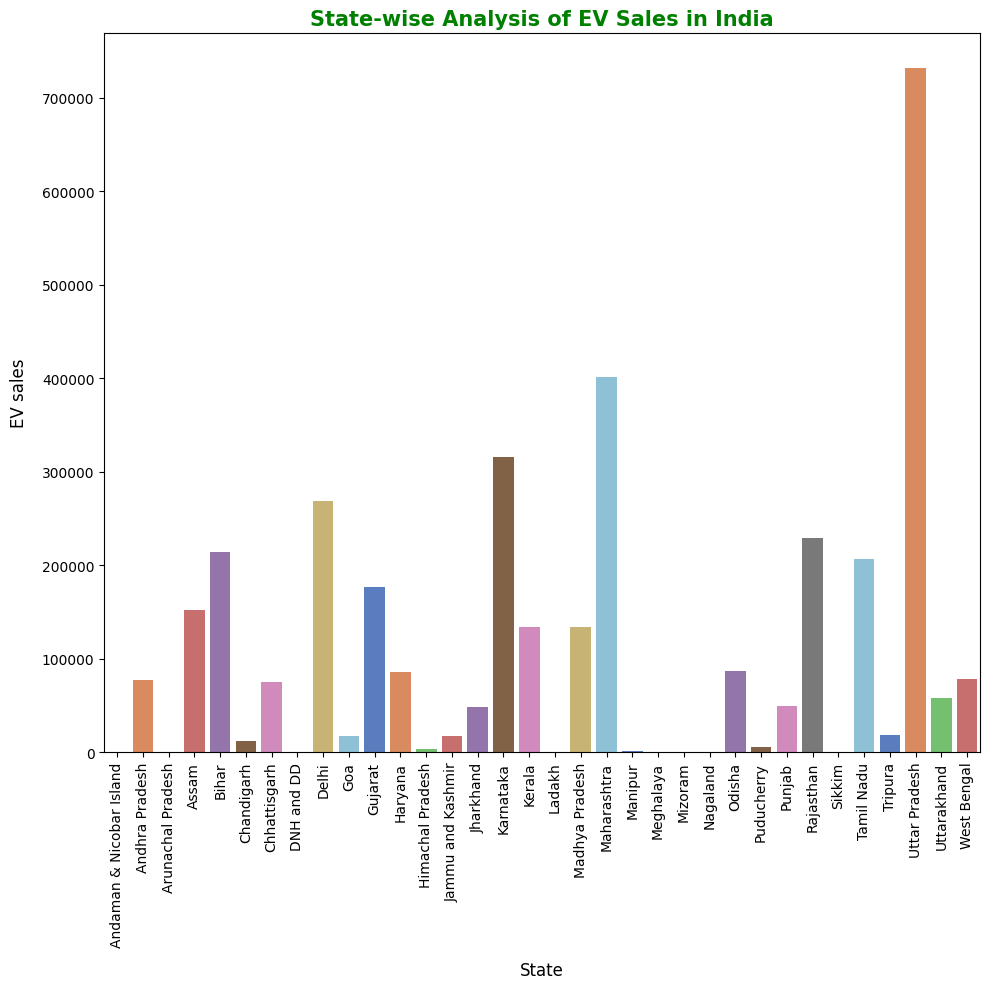

In [113]:
#Plot State-wise analysis of EV sales
plt.figure(figsize=(10,10))
sns.barplot(x=statewise_sales['State'],y=statewise_sales['EV_Sales'],data=data_sorted1,hue='State',palette='muted',legend=False)
plt.title('State-wise Analysis of EV Sales in India',fontsize=15,fontweight='bold',color='green')
plt.xlabel('State',fontsize=12,labelpad=10)
plt.ylabel('EV sales',fontsize=12,labelpad=10)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

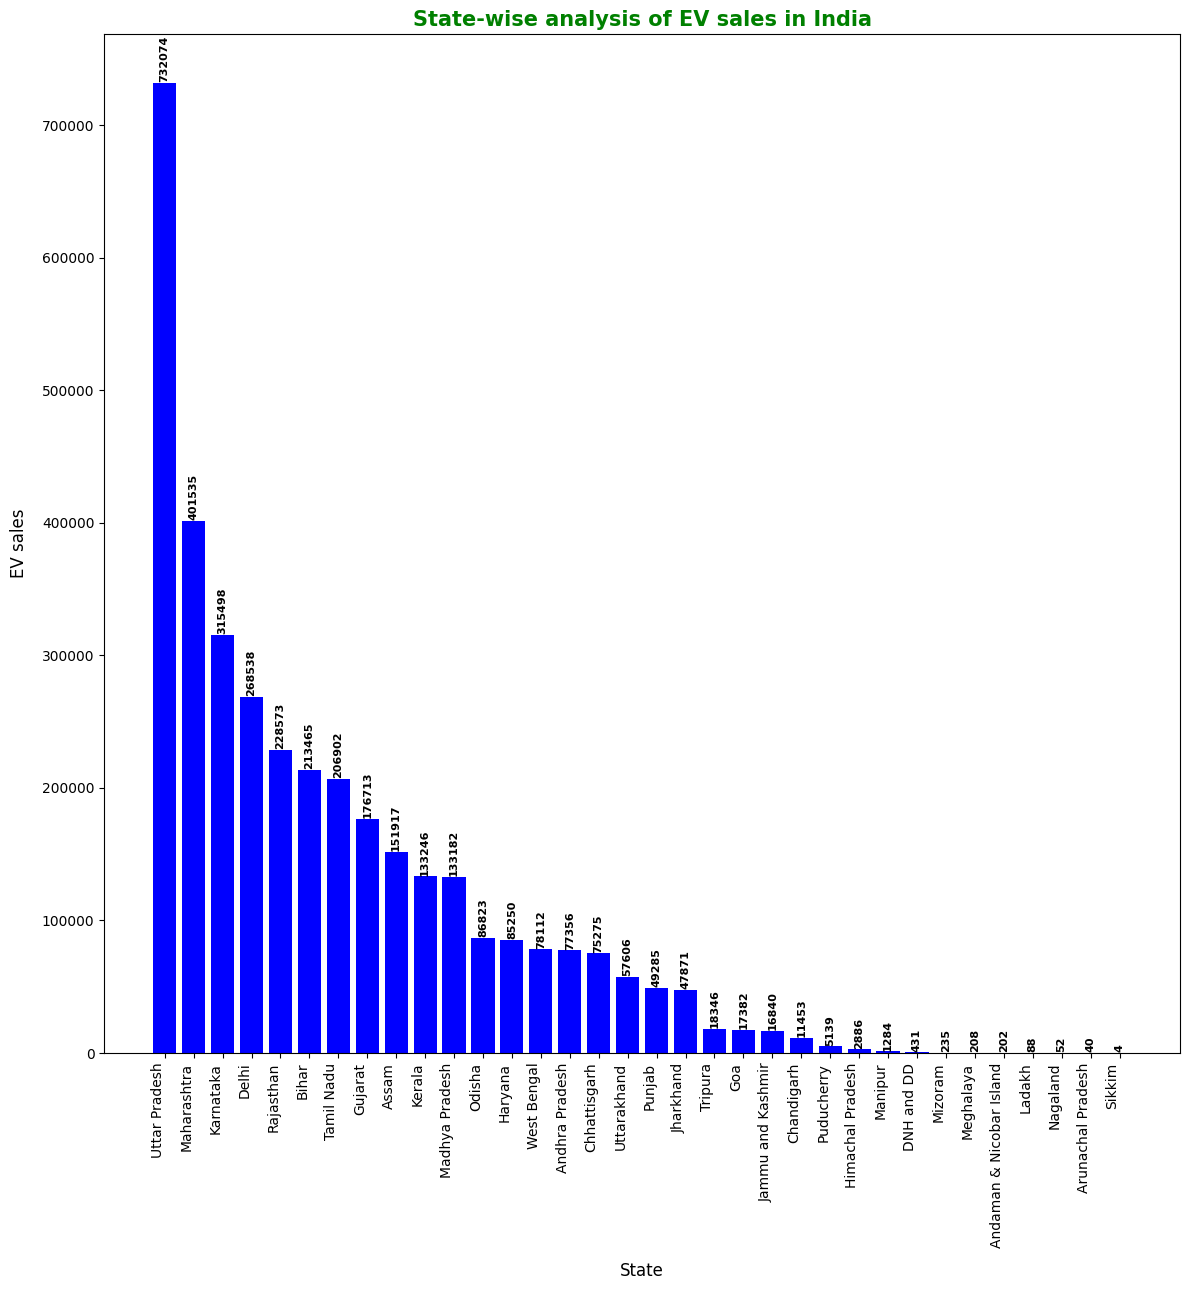

In [114]:
#State-wise analysis of EV sales
plt.figure(figsize=(12,13))
bars=plt.bar(x='State',height='EV_Sales',data=data_sorted1,color='b')
plt.title('State-wise analysis of EV sales in India',fontsize=15,fontweight='bold',color='green')
plt.xlabel('State',fontsize=12,labelpad=10)
plt.ylabel('EV sales',fontsize=12,labelpad=10)
plt.xticks(rotation=90,ha='right')
 # Add labels **above** the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 500,                    # Slightly above the bar
        str(int(height)),
        ha='center',
        va='bottom',
        rotation=90,
        fontsize=8,
        fontweight='bold'
    )
plt.tight_layout()
plt.show()

In [115]:
#'Top 10 Indian States by EV Sales
Top_10_state=data_sorted1.head(10)
Top_10_state

,State,EV_Sales
31,Uttar Pradesh,732074.0
19,Maharashtra,401535.0
15,Karnataka,315498.0
8,Delhi,268538.0
27,Rajasthan,228573.0
4,Bihar,213465.0
29,Tamil Nadu,206902.0
10,Gujarat,176713.0
3,Assam,151917.0
16,Kerala,133246.0


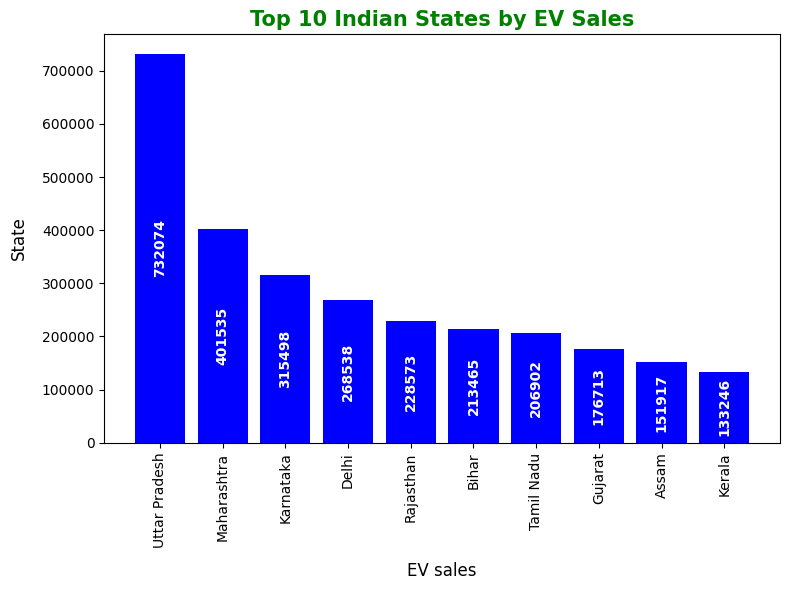

In [116]:
#Top 10 Indian States by EV Sales
plt.figure(figsize=(8,6))
bars=plt.bar(x='State',height='EV_Sales',data=Top_10_state,color='b')
plt.title('Top 10 Indian States by EV Sales',fontsize=15,fontweight='bold',color='green')
plt.ylabel('State',fontsize=12,labelpad=10)
plt.xlabel('EV sales',fontsize=12,labelpad=10)
plt.xticks(rotation=90)
for bar in bars:                 # Add vertical labels inside bars
    height = bar.get_height()
    if height > 0:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height * 0.5,                 # Middle of the bar
            str(int(height)),
            ha='center',
            va='center',
            fontsize=10,
            rotation=90,                 # Vertical text
            color='white',
            fontweight='bold'
        )
plt.tight_layout()
plt.show()

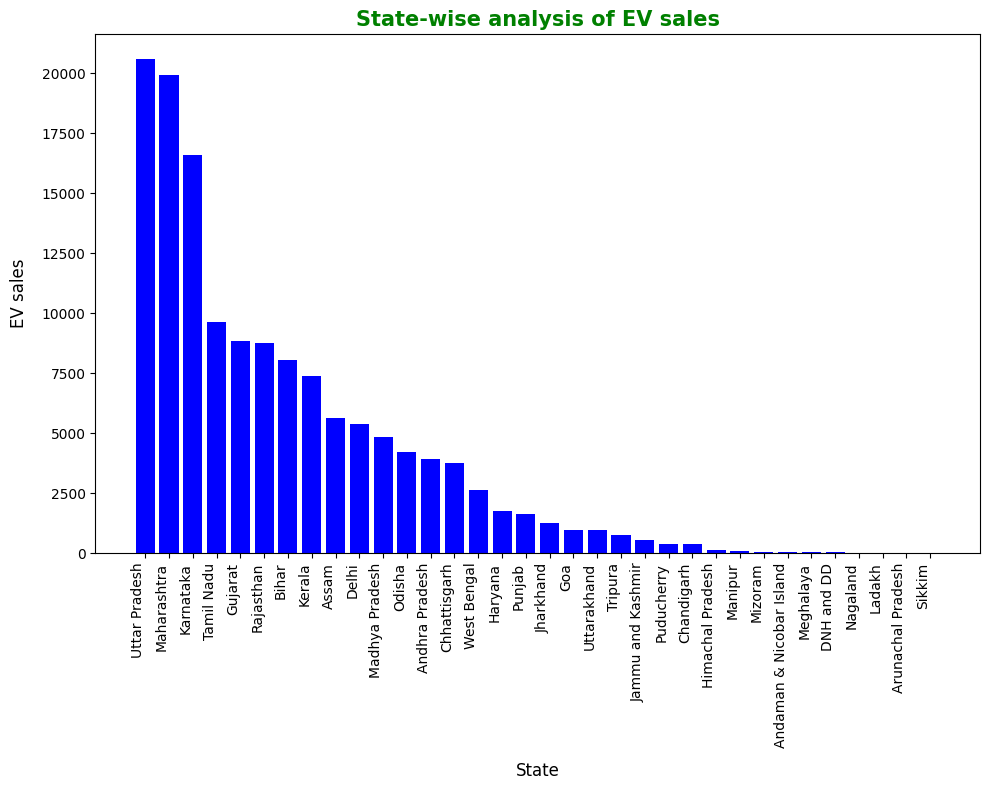

In [117]:
#State-wise analysis of EV sales
plt.figure(figsize=(10,8))
plt.bar(x='State',height='EV_Sales_Quantity',data=data_sorted,color='b')
plt.title('State-wise analysis of EV sales',fontsize=15,fontweight='bold',color='green')
plt.xlabel('State',fontsize=12,labelpad=10)
plt.ylabel('EV sales',fontsize=12,labelpad=10)
plt.xticks(rotation=90,ha='right')
plt.tight_layout()
plt.show()

In [118]:
data.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0


In [119]:
# Group and sum EV sales by vehicle class
classwise_sales = data.groupby('Vehicle_Class')['EV_Sales_Quantity'].sum().reset_index()
classwise_sales = classwise_sales.sort_values(by='EV_Sales_Quantity', ascending=False)
classwise_sales

<ipython-input-119-e490b33e5576>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Vehicle_Class,EV_Sales_Quantity
31,M-CYCLE/SCOOTER,1697373.0
18,E-RICKSHAW(P),1408127.0
40,MOTOR CAR,130676.0
17,E-RICKSHAW WITH CART (G),90656.0
59,THREE WHEELER (PASSENGER),76132.0
...,...,...
62,TOWER WAGON,0.0
61,TOW TRUCK,0.0
68,TREE TRIMMING VEHICLE,0.0
70,VEHICLE FITTED WITH GENERATOR,0.0


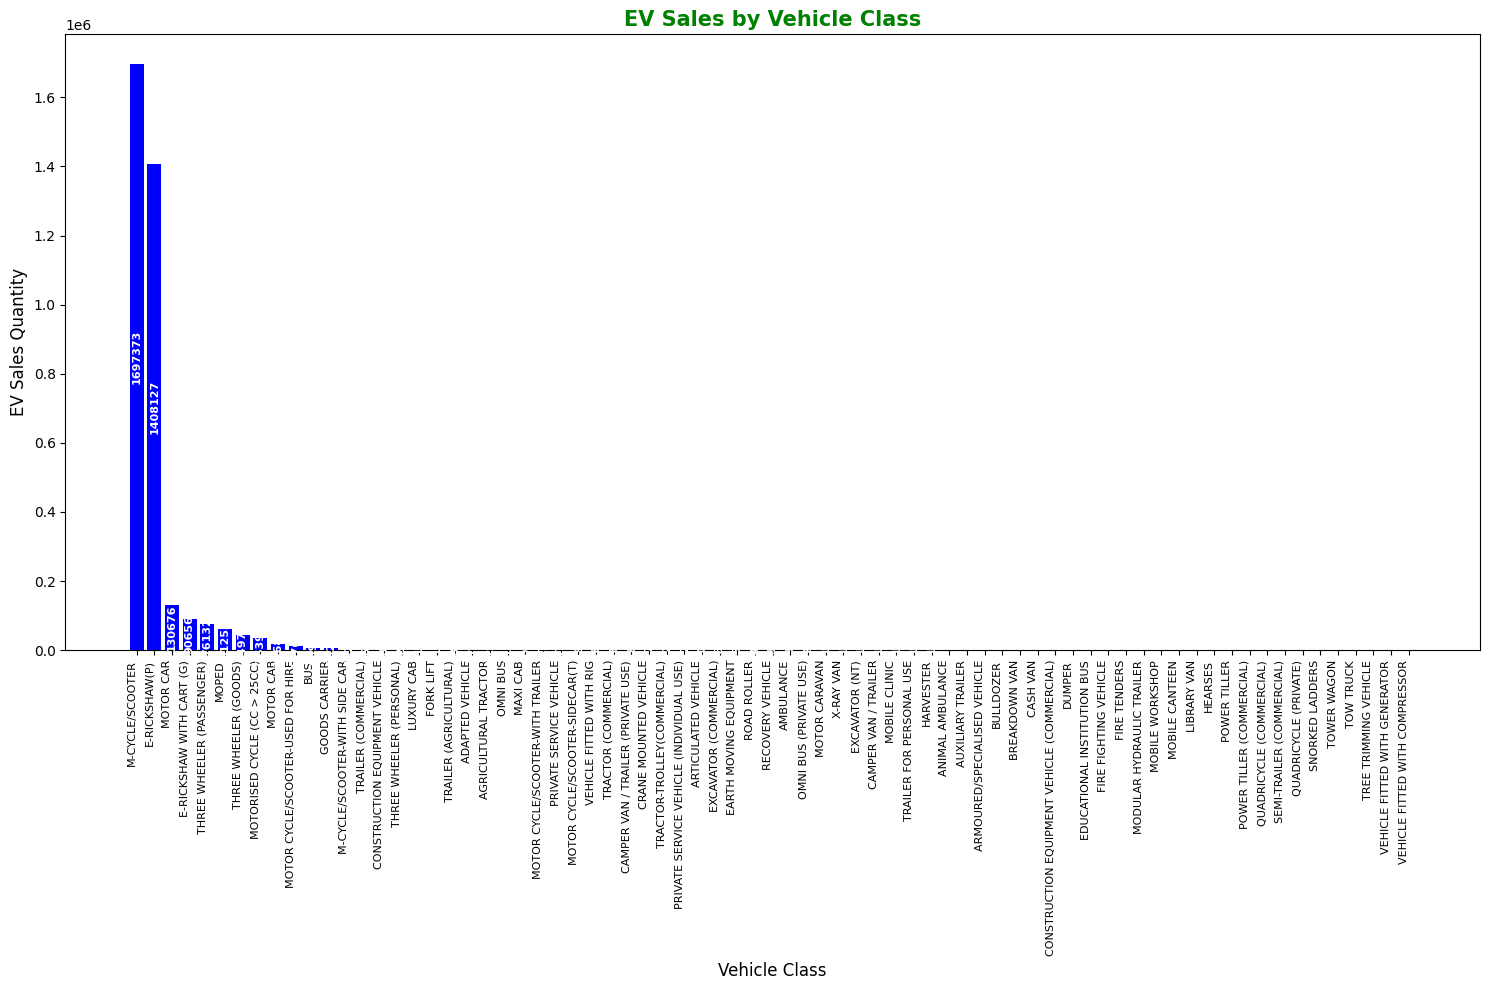

In [120]:
# Plot EV Sales by Vehicle Class
plt.figure(figsize=(15,10))
bars=plt.bar(x='Vehicle_Class',height='EV_Sales_Quantity',data=classwise_sales,color='b')
plt.title('EV Sales by Vehicle Class', fontsize=15, fontweight='bold', color='green')
plt.xlabel('Vehicle Class', fontsize=12)
plt.ylabel('EV Sales Quantity', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.xticks(fontsize=8)
for bar in bars:                 # Add vertical labels inside bars
    height = bar.get_height()
    if height > 0:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height * 0.5,                 # Middle of the bar
            str(int(height)),
            ha='center',
            va='center',
            fontsize=8,
            rotation=90,                 # Vertical text
            color='white',
            fontweight='bold'
        )
plt.tight_layout()
plt.show()


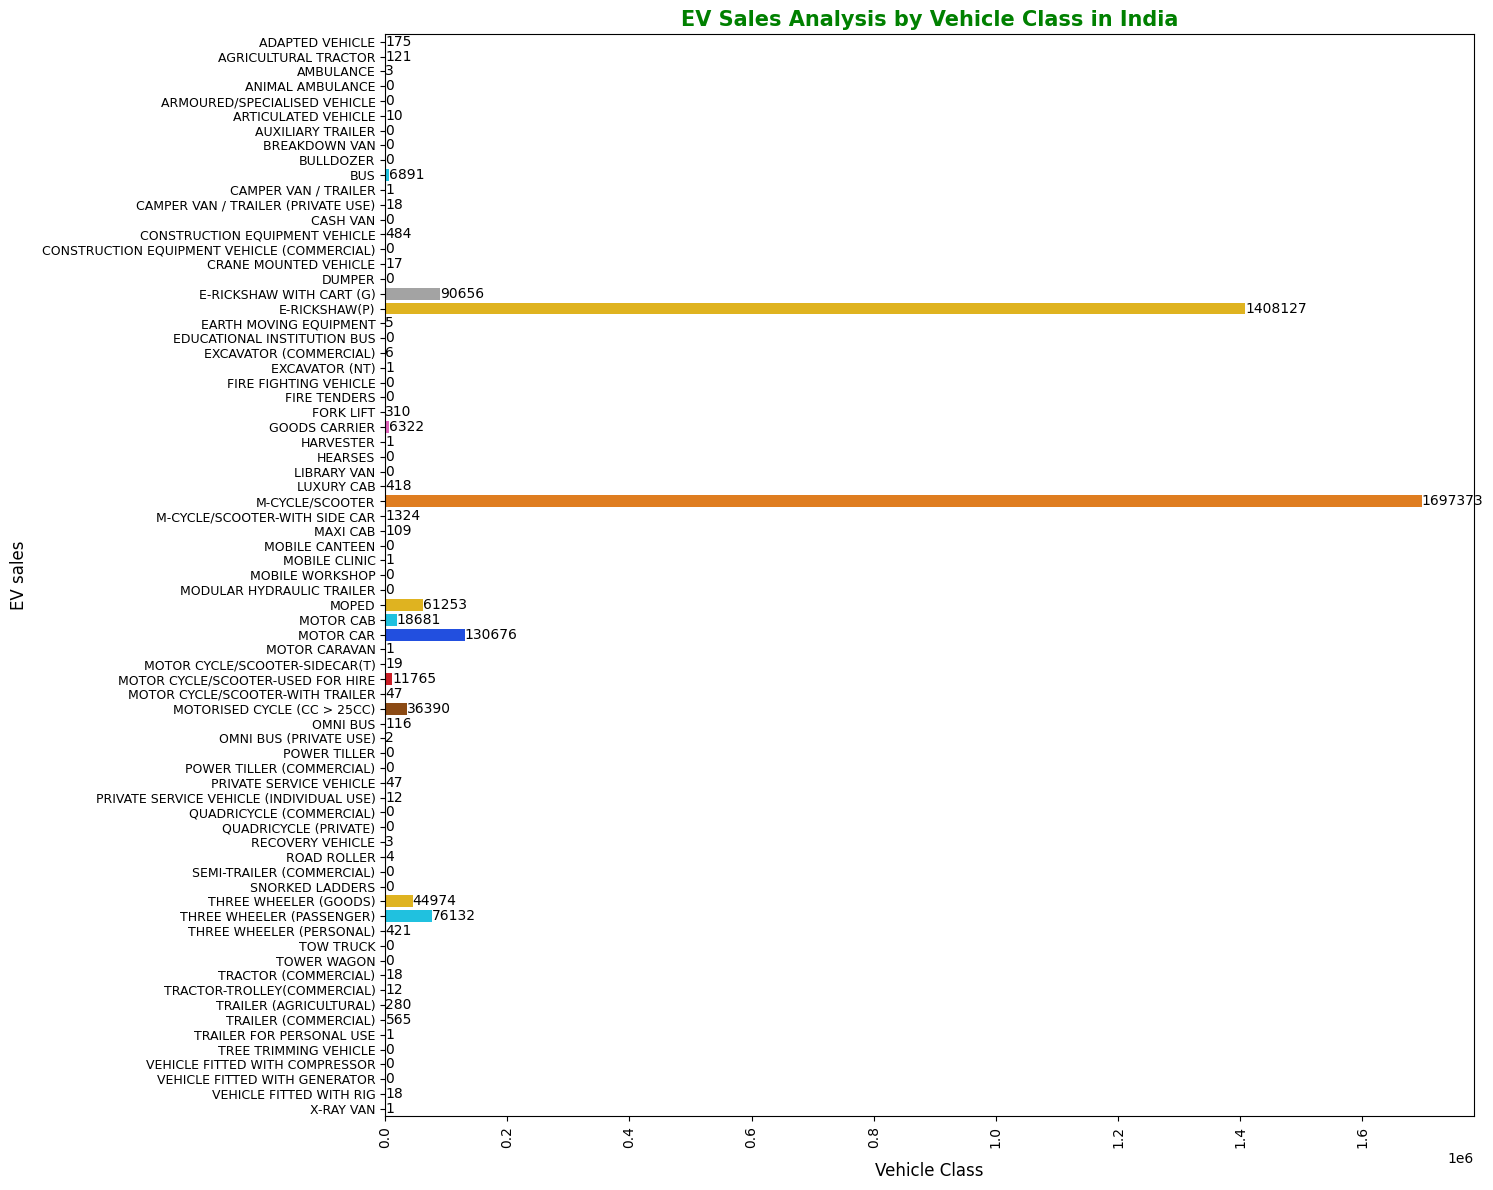

In [121]:
#EV Sales Analysis by Vehicle Class
plt.figure(figsize=(15,12))
ax=sns.barplot(y=classwise_sales['Vehicle_Class'],x=classwise_sales['EV_Sales_Quantity'],data=classwise_sales,hue='Vehicle_Class',palette='bright',legend=False)
plt.title('EV Sales Analysis by Vehicle Class in India',fontsize=15,fontweight='bold',color='green')
plt.xlabel('Vehicle Class',fontsize=12,labelpad=10)
plt.ylabel('EV sales',fontsize=12,labelpad=10)
plt.xticks(rotation=90)
plt.yticks(fontsize=9)
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height()/2,
            int(p.get_width()), ha='left', va='center')
plt.tight_layout()
plt.show()

In [122]:
Top_10_classwise_sales=classwise_sales.head(10)
Top_10_classwise_sales

,Vehicle_Class,EV_Sales_Quantity
31,M-CYCLE/SCOOTER,1697373.0
18,E-RICKSHAW(P),1408127.0
40,MOTOR CAR,130676.0
17,E-RICKSHAW WITH CART (G),90656.0
59,THREE WHEELER (PASSENGER),76132.0
38,MOPED,61253.0
58,THREE WHEELER (GOODS),44974.0
45,MOTORISED CYCLE (CC > 25CC),36390.0
39,MOTOR CAB,18681.0
43,MOTOR CYCLE/SCOOTER-USED FOR HIRE,11765.0


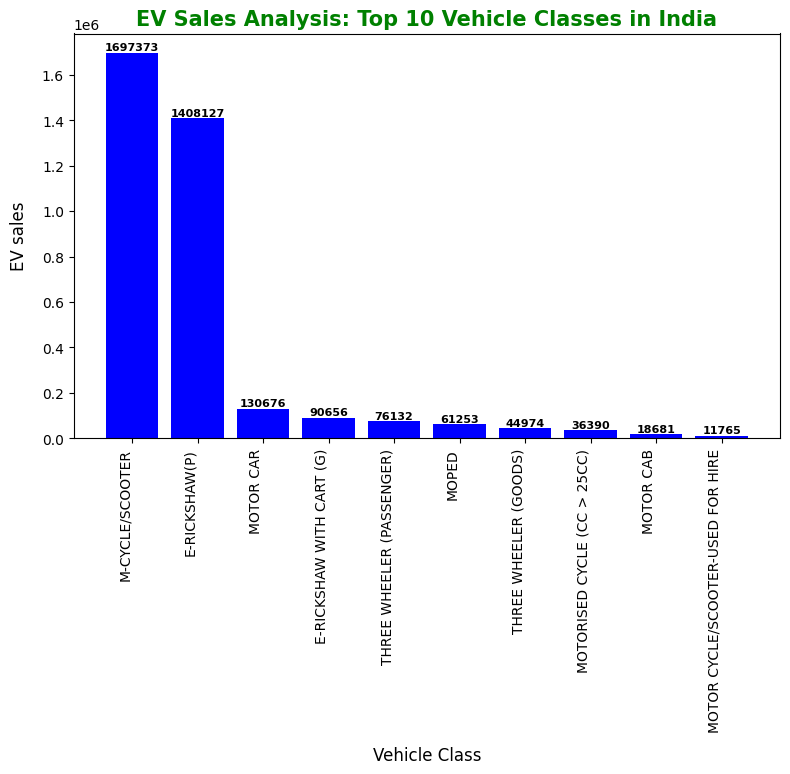

In [124]:
#Plot for Top 10 Vehicle class wise EV sales
plt.figure(figsize=(8,8))
bars=plt.bar(x='Vehicle_Class',height='EV_Sales_Quantity',data=Top_10_classwise_sales,color='b')
plt.title('EV Sales Analysis: Top 10 Vehicle Classes in India',fontsize=15,fontweight='bold',color='green')
plt.xlabel('Vehicle Class',fontsize=12,labelpad=10)
plt.ylabel('EV sales',fontsize=12,labelpad=10)
plt.xticks(rotation=90,ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 500,                    # Slightly above the bar
        str(int(height)),
        ha='center',
        va='bottom',
        rotation=0,
        fontsize=8,
        fontweight='bold'
    )
plt.tight_layout()
plt.show()

In [125]:
# Group and sum EV sales by vehicle Category
Vehicle_category_sales = data.groupby('Vehicle_Category')['EV_Sales_Quantity'].sum().reset_index()
Vehicle_category_sales = Vehicle_category_sales.sort_values(by='EV_Sales_Quantity', ascending=False)
Vehicle_category_sales

<ipython-input-125-db7bd23d05b6>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Vehicle_Category,EV_Sales_Quantity
0,2-Wheelers,1808105.0
1,3-Wheelers,1620310.0
2,4-Wheelers,149775.0
4,Others,8612.0
3,Bus,7009.0


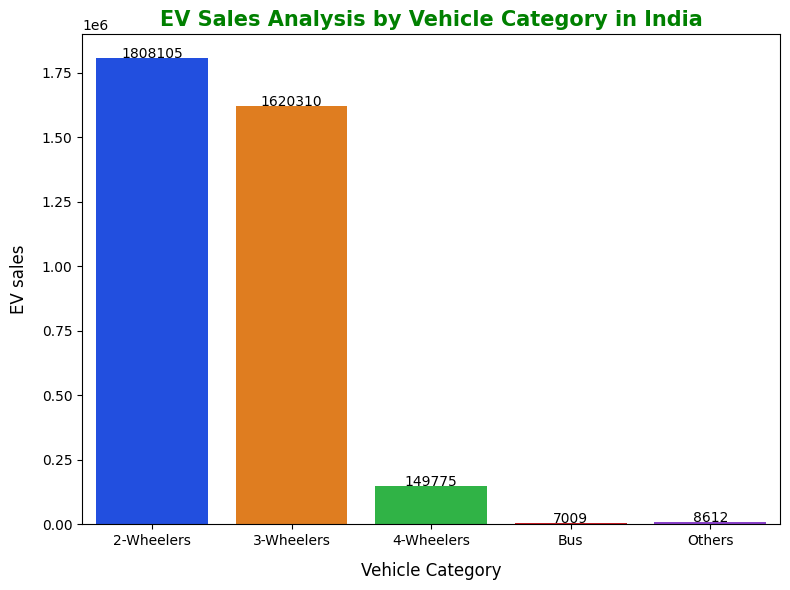

In [126]:
#EV Sales Analysis by Vehicle Category in India
plt.figure(figsize=(8,6))
ax=sns.barplot(x='Vehicle_Category',y='EV_Sales_Quantity',data=Vehicle_category_sales,hue='Vehicle_Category',palette='bright')
plt.title('EV Sales Analysis by Vehicle Category in India',fontsize=15,fontweight='bold',color='green')
plt.xlabel('Vehicle Category',fontsize=12,labelpad=10)
plt.ylabel('EV sales',fontsize=12,labelpad=10)
for p in ax.patches:
    height = p.get_height()
    if height > 0:                                                        # Avoid labeling zero-height bars
        ax.text(
            p.get_x() + p.get_width() / 2.,                               # center text on bar
            height + 10,                                                   # slightly above bar
            int(height),                                                  # the count value
            ha="center", fontsize=10
        )

plt.tight_layout()
plt.show()

In [127]:
# Group and sum EV sales by vehicle Type
Vehicle_Type_sales = data.groupby('Vehicle_Type')['EV_Sales_Quantity'].sum().reset_index()
Vehicle_Type_sales = Vehicle_Type_sales.sort_values(by='EV_Sales_Quantity', ascending=False)
Vehicle_Type_sales

<ipython-input-127-0f7f8d4486ce>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Vehicle_Type,EV_Sales_Quantity
0,2W_Personal,1796340.0
6,3W_Shared_LowSpeed,1408127.0
7,4W_Personal,130676.0
3,3W_Goods_LowSpeed,90656.0
5,3W_Shared,76132.0
2,3W_Goods,44974.0
8,4W_Shared,19099.0
1,2W_Shared,11765.0
11,Others,8612.0
9,Bus,7009.0


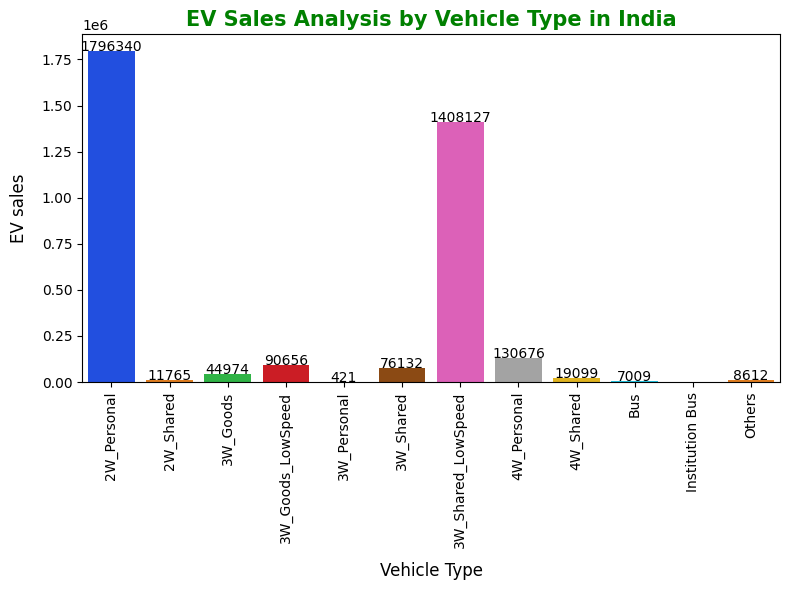

In [128]:
#EV Sales Analysis by Vehicle Type in India
plt.figure(figsize=(8,6))
ax=sns.barplot(x='Vehicle_Type',y='EV_Sales_Quantity',data=Vehicle_Type_sales,hue='Vehicle_Type',palette='bright',legend=False)
plt.title('EV Sales Analysis by Vehicle Type in India',fontsize=15,fontweight='bold',color='green')
plt.xlabel('Vehicle Type',fontsize=12,labelpad=10)
plt.ylabel('EV sales',fontsize=12,labelpad=10)
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    if height > 0:                                                        # Avoid labeling zero-height bars
        ax.text(
            p.get_x() + p.get_width() / 2.,                               # center text on bar
            height + 20,                                                   # slightly above bar
            int(height),                                                  # the count value
            ha="center", fontsize=10
        )

plt.tight_layout()
plt.show()

<ipython-input-129-581b9352c085>:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-129-581b9352c085>:6: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



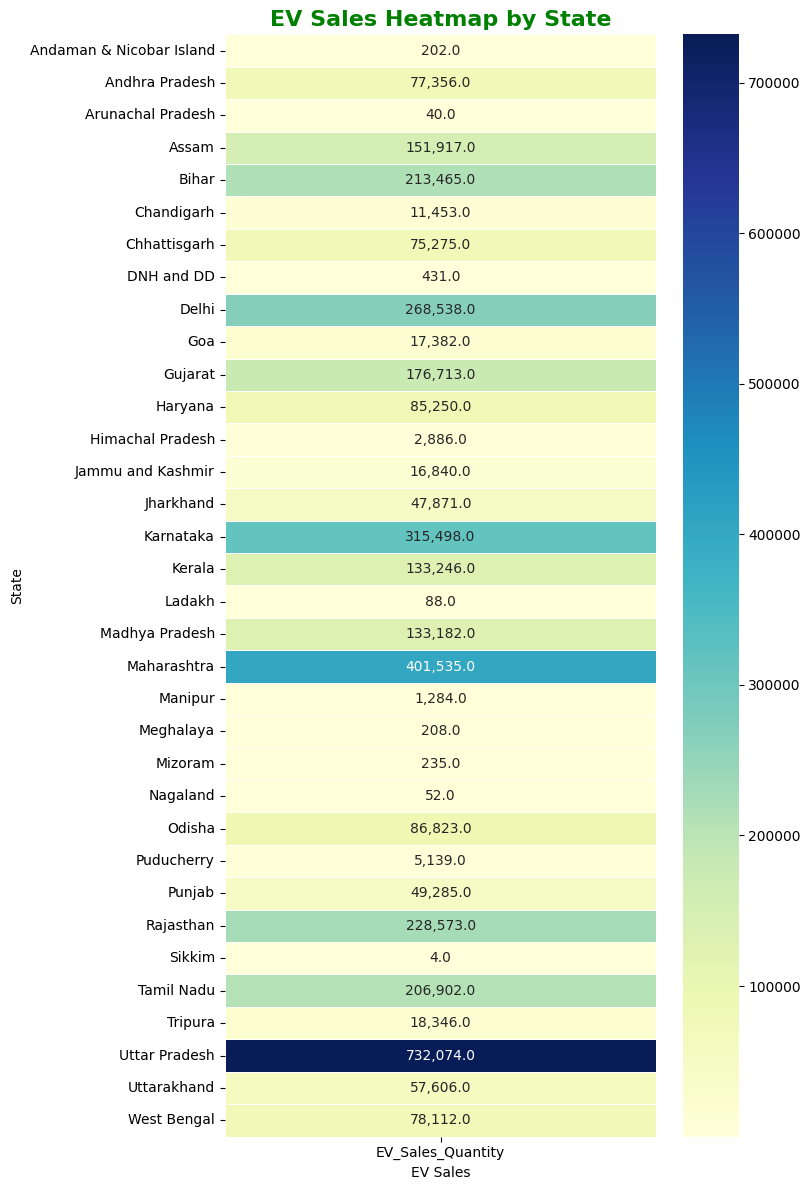

In [129]:
#Heatmap for EV sales
# Group EV sales by State
statewise_sales = data.groupby('State')['EV_Sales_Quantity'].sum().reset_index()

# Pivot the data to make a 2D shape (needed for heatmap)
heatmap_data = statewise_sales.pivot_table(index='State', values='EV_Sales_Quantity')

# Plot heatmap
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=',', linewidths=0.5)

plt.title('EV Sales Heatmap by State', fontsize=16, fontweight='bold', color='green')
plt.xlabel('EV Sales')
plt.ylabel('State')
plt.tight_layout()
plt.show()





In [130]:
import pandas as pd
import plotly.express as px
# Step 1: Group by State and sum EV sales
statewise_sales = data.groupby('State')['EV_Sales_Quantity'].sum().reset_index()
statewise_sales = statewise_sales.sort_values(by='EV_Sales_Quantity', ascending=False)

# Step 2: Create interactive bar chart
fig = px.bar(
    statewise_sales,
    x='State',
    y='EV_Sales_Quantity',
    color='EV_Sales_Quantity',
    color_continuous_scale='Viridis',
    title='EV Sales by State in India',
    labels={'EV_Sales_Quantity': 'Total EV Sales', 'State': 'Indian States'},
    text='EV_Sales_Quantity'
)

# Step 3: Customize appearance
fig.update_traces(texttemplate='%{text:,}', textposition='outside')
fig.update_layout(
    xaxis_tickangle=-45,
    title_font_size=20,
    plot_bgcolor='rgba(0,0,0,0)',
    yaxis=dict(title='EV Sales', gridcolor='lightgray'),
    xaxis=dict(title='State'),
    uniformtext_minsize=8, uniformtext_mode='hide'
)
fig.show()


<ipython-input-130-0ccf93ead7a3>:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# **Final Conclusion**

In [131]:
import textwrap

conclusions = [

    "Total EV Sales Observed: 3,593,811 units\n",

    "Significant growth in EV sales observed after the year 2020.\n\n",

    "Top 5 States by EV Sales:\n"
    "   - Uttar Pradesh\n"
    "   - Maharashtra\n"
    "   - Karnataka\n"
    "   - Delhi\n"
    "   - Rajasthan\n\n",

    "Top Vehicle Classes:\n"
    "   - M-Cycle/Scooter (highest)\n"
    "   - E-Rickshaw (P)\n"
    "   - Motor Car\n\n",

    "Top Vehicle Categories:\n"
    "   - 2-Wheeler\n"
    "   - 3-Wheeler\n\n",

    "Top Vehicle Types:\n"
    "   - 2W_Personal\n"
    "   - 3W_Shared_Low Speed\n"
    "   - 4W_Personal\n\n",

    "EV sales have surged post-2020, with strong adoption in northern and urban states.\n",

    "Two-wheelers dominate the market, showing that affordability and last-mile mobility "
    "are key drivers of EV adoption.\n",

    "There is immense potential for growth in underperforming regions and vehicle types, "
    "especially as policy and infrastructure continue to improve.",
]

# Print each point in a formatted way
print("\n" + "="*50)
print("PROJECT CONCLUSION".center(50))
print("="*50+ "\n")

for i, point in enumerate(conclusions, start=1):
    wrapped_text = textwrap.fill(f"{i}. {point}", width=80)
    print(wrapped_text + "\n")


print("="*50)







                PROJECT CONCLUSION                

1. Total EV Sales Observed: 3,593,811 units

2. Significant growth in EV sales observed after the year 2020.

3. Top 5 States by EV Sales:    - Uttar Pradesh    - Maharashtra    - Karnataka
- Delhi    - Rajasthan

4. Top Vehicle Classes:    - M-Cycle/Scooter (highest)    - E-Rickshaw (P)    -
Motor Car

5. Top Vehicle Categories:    - 2-Wheeler    - 3-Wheeler

6. Top Vehicle Types:    - 2W_Personal    - 3W_Shared_Low Speed    - 4W_Personal

7. EV sales have surged post-2020, with strong adoption in northern and urban
states.

8. Two-wheelers dominate the market, showing that affordability and last-mile
mobility are key drivers of EV adoption.

9. There is immense potential for growth in underperforming regions and vehicle
types, especially as policy and infrastructure continue to improve.



---
**Project Completed By:**  
**Nitu Dave**  
*Google Data Analytics Certified | MSc Physics | Data Enthusiast*
